# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

628


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [94]:
# Set up calls with json
import json

# base url
base_url = f"http://api.openweathermap.org/data/2.5/weather?"

# to make temps in farenheit (from Open Weather API documentation)
units = "imperial"
number = 0
# make empty lists for collecting data
lat = []
lon = []
temp = []
hum = []
clouds = []
wind_speed = []
city_name = []
max_temp = []

#loop through the list of cities generated above and get information needed to make graphs below
for city in cities:
    query = f'q={city}&units={units}&appid={weather_api_key}'
    response = requests.get(base_url+query).json()
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        max_temp.append(response['main']['temp_max'])
        number = number + 1
        print(f'{city} #{number} out of {len(cities)} is found and added to the list')
    except KeyError:
        print(f'{city} record #{number} is unknown and skipped.')


rn #238 out of 628 is found and added to the list
aquiraz #239 out of 628 is found and added to the list
terrace bay #240 out of 628 is found and added to the list
sorong #241 out of 628 is found and added to the list
necochea #242 out of 628 is found and added to the list
masterton #243 out of 628 is found and added to the list
boende #244 out of 628 is found and added to the list
ribeira grande #245 out of 628 is found and added to the list
victoria #246 out of 628 is found and added to the list
sulphur springs #247 out of 628 is found and added to the list
listvyanskiy #248 out of 628 is found and added to the list
chuy #249 out of 628 is found and added to the list
vestmanna #250 out of 628 is found and added to the list
saltabarranca #251 out of 628 is found and added to the list
colac #252 out of 628 is found and added to the list
pyapon #253 out of 628 is found and added to the list
nome #254 out of 628 is found and added to the list
la ronge #255 out of 628 is found and added t

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [100]:
cities_df = pd.DataFrame({"City" : city_name, "Lat" : lat, "Lon": lon, "Temp (F)" : temp, "Humidity" : hum, "Cloudiness": clouds, "Wind Speed": wind_speed, "Max Temp (F)": max_temp})
cities_df.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [101]:
# check the number of cities that have >100% humidity
greaterthan100 = cities_df[cities_df['Humidity'] > 100].index
print(len(greaterthan100))

# look at top humidity values to check
hum_sorted = cities_df.sort_values('Humidity', ascending=False)
hum_sorted.head(25)


0


,City,Lat,Lon,Temp (F),Humidity,Cloudiness,Wind Speed,Max Temp (F)
0,Punta Arenas,-53.1500,-70.9167,42.39,100,75,3.44,42.80
312,Klaksvík,62.2266,-6.5890,42.80,100,100,4.61,42.80
55,Springdale,36.1867,-94.1288,53.67,100,90,3.44,54.00
453,Toamasina,-18.1667,49.3833,73.40,100,75,10.36,73.40
433,Bereda,43.2686,-7.5406,54.54,100,97,3.00,55.00
84,Port Elizabeth,-33.9180,25.5701,57.20,100,90,9.22,57.20
379,Bartlesville,36.7473,-95.9808,57.25,100,90,4.61,57.99
538,Kiryat Gat,31.6100,34.7642,67.93,100,41,4.00,69.01
329,Leeuwarden,53.2014,5.8086,40.24,100,90,2.30,43.00
114,Mar del Plata,-38.0023,-57.5575,61.29,100,90,4.61,62.01


In [ ]:
#  Get the indices of cities that have humidity over 100%.



# There are no cities with greater than 100% humidity

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

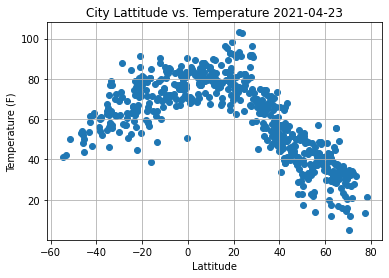

<Figure size 432x288 with 0 Axes>

In [95]:
import datetime

#Plot latitude vs temperature and save as .png
plt.scatter(cities_df['Lat'], cities_df['Temp (F)'])
plt.title(f'City Lattitude vs. Temperature {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.show()
plt.savefig('lat_temp.png')

## Latitude vs. Humidity Plot

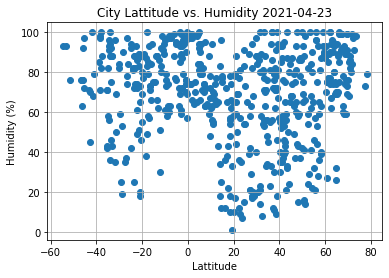

<Figure size 432x288 with 0 Axes>

In [96]:
plt.scatter(cities_df['Lat'], cities_df['Humidity'])
plt.title(f'City Lattitude vs. Humidity {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()
plt.savefig('lat_hum.png')

## Latitude vs. Cloudiness Plot

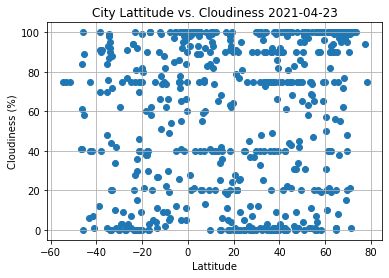

<Figure size 432x288 with 0 Axes>

In [98]:
plt.scatter(cities_df['Lat'], cities_df['Cloudiness'])
plt.title(f'City Lattitude vs. Cloudiness {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()
plt.savefig('lat_temp.clouds.png')

## Latitude vs. Wind Speed Plot

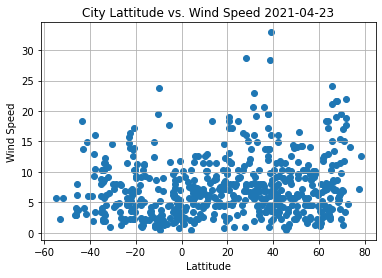

<Figure size 432x288 with 0 Axes>

In [99]:
plt.scatter(cities_df['Lat'], cities_df['Wind Speed'])
plt.title(f'City Lattitude vs. Wind Speed {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()
plt.savefig('lat_wind.png')

## Linear Regression

In [103]:
# Make df for Northern and souther hemisphere
NH_df = cities_df.loc[cities_df['Lat'] > 0, :]

SH_df = cities_df.loc[cities_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

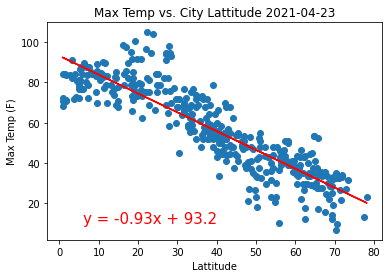

<Figure size 432x288 with 0 Axes>

In [118]:
plt.scatter(NH_df['Lat'], NH_df['Max Temp (F)'])
plt.title(f'Max Temp vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Max Temp (F)')

x_values = NH_df['Lat']
y_values = NH_df['Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10),fontsize=15, color="red")

plt.show()
plt.savefig('NH_maxtemp_lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

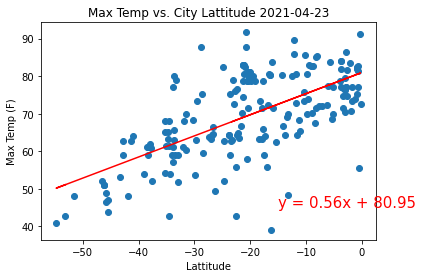

<Figure size 432x288 with 0 Axes>

In [119]:
plt.scatter(SH_df['Lat'], SH_df['Max Temp (F)'])
plt.title(f'Max Temp vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Max Temp (F)')

x_values = SH_df['Lat']
y_values = SH_df['Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-15,45),fontsize=15, color="red")

plt.show()
plt.savefig('SH_maxtemp_lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

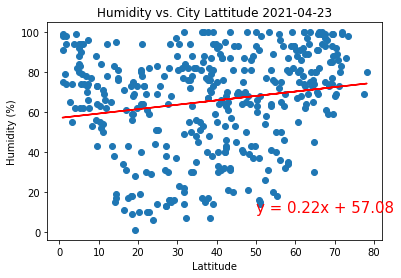

<Figure size 432x288 with 0 Axes>

In [120]:
plt.scatter(NH_df['Lat'], NH_df['Humidity'])
plt.title(f'Humidity vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')

x_values = NH_df['Lat']
y_values = NH_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50,10),fontsize=15, color="red")

plt.show()
plt.savefig('NH_hum_lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

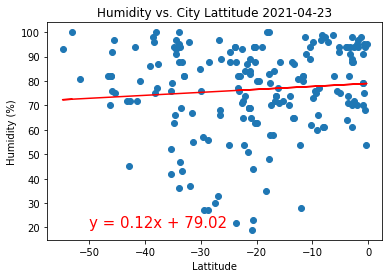

<Figure size 432x288 with 0 Axes>

In [121]:
plt.scatter(SH_df['Lat'], SH_df['Humidity'])
plt.title(f'Humidity vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')

x_values = SH_df['Lat']
y_values = SH_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,20),fontsize=15, color="red")

plt.show()
plt.savefig('SH_hum_lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

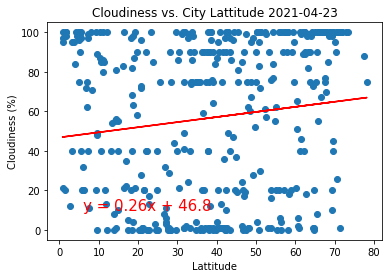

<Figure size 432x288 with 0 Axes>

In [122]:
plt.scatter(NH_df['Lat'], NH_df['Cloudiness'])
plt.title(f'Cloudiness vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')

x_values = NH_df['Lat']
y_values = NH_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10),fontsize=15, color="red")

plt.show()
plt.savefig('NH_clouds_lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

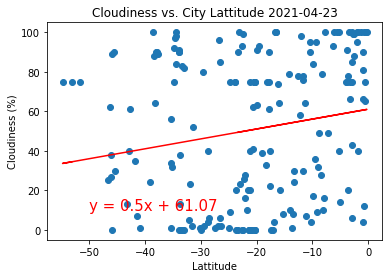

<Figure size 432x288 with 0 Axes>

In [124]:
plt.scatter(SH_df['Lat'], SH_df['Cloudiness'])
plt.title(f'Cloudiness vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')

x_values = SH_df['Lat']
y_values = SH_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,10),fontsize=15, color="red")

plt.show()
plt.savefig('SH_clouds_lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
plt.scatter(NH_df['Lat'], NH_df['Cloudiness'])
plt.title(f'Cloudiness vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')

x_values = NH_df['Lat']
y_values = NH_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10),fontsize=15, color="red")

plt.show()
plt.savefig('NH_clouds_lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression